In [ ]:
!pip install pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=8514f4a57d70b704a73ceb6778680f1b0bb99bd830b5965d65bf344c6034806a
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [ ]:
import pandas as pd
import pm4py

In [ ]:
import pm4py

ocel = pm4py.read_ocel2_json("order-management.json")

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


In [ ]:
from typing import Dict, Collection

def print_dict_data(data: Dict[str, Collection[str]]):
    for key, collection in data.items():
        print(f"{key}: {' ,'.join(collection)}")

In [ ]:
object_types = pm4py.ocel_get_object_types(ocel)
print(object_types)

['orders', 'items', 'packages', 'customers', 'products', 'employees']


In [ ]:
ot_activities = pm4py.ocel_object_type_activities(ocel)
print_dict_data(ot_activities)

customers: confirm order ,place order
employees: failed delivery ,pick item ,create package ,item out of stock ,reorder item ,package delivered ,confirm order ,send package
items: failed delivery ,pick item ,create package ,place order ,item out of stock ,reorder item ,package delivered ,pay order ,payment reminder ,confirm order ,send package
orders: payment reminder ,confirm order ,pay order ,place order
products: failed delivery ,pick item ,create package ,place order ,item out of stock ,reorder item ,package delivered ,pay order ,payment reminder ,confirm order ,send package
packages: send package ,create package ,package delivered ,failed delivery


In [ ]:
attribute_names = pm4py.ocel_get_attribute_names(ocel)
print(attribute_names)

['price', 'role', 'weight']


In [ ]:
from typing import Dict

def print_nested_dict_data(data: Dict[str, Dict[str, int]]):
    for outer_key, inner_dict in data.items():
        print(outer_key + ": ", end="")
        print(" ".join([f"{key}:{value}" for key, value in inner_dict.items()]))

In [ ]:
objects_ot_count = pm4py.ocel_objects_ot_count(ocel)

print_nested_dict_data(objects_ot_count)

Streaming output truncated to the last 5000 lines.
place_o-990239: items:3 orders:1 products:3 customers:1
place_o-990240: products:5 items:5 orders:1 customers:1
place_o-990241: products:6 items:6 customers:1 orders:1
place_o-990242: products:4 items:4 orders:1 customers:1
place_o-990243: products:2 items:3 customers:1 orders:1
place_o-990244: items:2 customers:1 orders:1 products:2
place_o-990245: products:3 items:3 customers:1 orders:1
place_o-990246: products:4 orders:1 items:5 customers:1
place_o-990247: products:4 orders:1 items:5 customers:1
place_o-990248: items:3 products:3 customers:1 orders:1
place_o-990249: items:4 products:3 customers:1 orders:1
place_o-990250: items:3 products:3 orders:1 customers:1
place_o-990251: products:2 items:3 customers:1 orders:1
place_o-990252: products:5 customers:1 items:5 orders:1
place_o-990253: orders:1 items:3 products:3 customers:1
place_o-990254: products:5 items:7 orders:1 customers:1
place_o-990255: products:4 orders:1 items:4 customers

In [ ]:
from typing import Dict

def process_dictionary(input_dict: Dict[str, Dict[str, int]]) -> Dict[str, Dict[str, int]]:
    result_dict = {}
    outer_key_count = {}
    inner_key_count = {}

    for outer_key, inner_dict in input_dict.items():
        # Extracting the key until the first occurrence of '-'
        first_dash_index = outer_key.find('-')
        if first_dash_index != -1:
            modified_outer_key = outer_key[:first_dash_index]
        else:
            modified_outer_key = outer_key

        # Updating the result dictionary
        if modified_outer_key in result_dict:
            result_inner_dict = result_dict[modified_outer_key]
        else:
            result_inner_dict = {}

        for inner_key, value in inner_dict.items():
            # Adding the value to the inner dictionary
            if inner_key in result_inner_dict:
                result_inner_dict[inner_key] += value
            else:
                result_inner_dict[inner_key] = value

        result_dict[modified_outer_key] = result_inner_dict



        # Updating the count of occurrences of modified outer key
        if modified_outer_key in outer_key_count:
            outer_key_count[modified_outer_key] += 1
        else:
            outer_key_count[modified_outer_key] = 1

    return result_dict, outer_key_count

# Example usage
input_dict = objects_ot_count

result_dict, outer_key_count = process_dictionary(input_dict)
print("Processed Dictionary:")
print(result_dict)


Processed Dictionary:
{'confirm_o': {'items': 7659, 'products': 6980, 'orders': 2000, 'employees': 2000, 'customers': 2000}, 'create_p': {'items': 7659, 'employees': 1128, 'products': 6418, 'packages': 1128}, 'deliver_p': {'items': 7659, 'products': 6418, 'employees': 1128, 'packages': 1128}, 'fail_p': {'items': 2020, 'products': 1722, 'packages': 311, 'employees': 311}, 'out_of_stock_i': {'items': 1544, 'employees': 1544, 'products': 1544}, 'pay_o': {'items': 7659, 'products': 6980, 'orders': 2000}, 'pick_i': {'employees': 7659, 'items': 7659, 'products': 7659}, 'place_o': {'items': 7659, 'products': 6980, 'orders': 2000, 'customers': 2000}, 'reminder_o': {'items': 2214, 'products': 2034, 'orders': 566}, 'reorder_i': {'employees': 1544, 'items': 1544, 'products': 1544}, 'send_p': {'items': 7659, 'employees': 2178, 'products': 6418, 'packages': 1128}}


In [ ]:
print("\nCount of Occurrences of Modified Outer Keys:")
print(outer_key_count)


Count of Occurrences of Modified Outer Keys:
{'confirm_o': 2000, 'create_p': 1128, 'deliver_p': 1128, 'fail_p': 311, 'out_of_stock_i': 1544, 'pay_o': 2000, 'pick_i': 7659, 'place_o': 2000, 'reminder_o': 566, 'reorder_i': 1544, 'send_p': 1128}


In [ ]:
from typing import Dict

def process_dictionary(input_dict: Dict[str, Dict[str, int]]) -> Dict[str, Dict[str, int]]:
    result_dict = {}
    outer_key_count = {}
    inner_key_counts = {}  # Map to count occurrences of other inner keys
    inner_key_relations = {}  # New map to store relations between inner keys

    for outer_key, inner_dict in input_dict.items():
        # Extracting the key until the first occurrence of '-'
        first_dash_index = outer_key.find('-')
        if first_dash_index != -1:
            modified_outer_key = outer_key[:first_dash_index]
        else:
            modified_outer_key = outer_key

        # Updating the result dictionary
        if modified_outer_key in result_dict:
            result_inner_dict = result_dict[modified_outer_key]
        else:
            result_inner_dict = {}

        for inner_key, value in inner_dict.items():
            # Adding the value to the inner dictionary
            if inner_key in result_inner_dict:
                result_inner_dict[inner_key] += value
            else:
                result_inner_dict[inner_key] = value

            # Updating the inner key counts map
            if inner_key != modified_outer_key:  # Exclude counting itself
                if inner_key in inner_key_counts:
                    inner_key_counts[inner_key][modified_outer_key] = inner_key_counts[inner_key].get(modified_outer_key, 0) + value
                else:
                    inner_key_counts[inner_key] = {modified_outer_key: value}

            # Updating the inner key relations map
            if inner_key in inner_key_relations:
                inner_key_relations[inner_key][modified_outer_key] = value
            else:
                inner_key_relations[inner_key] = {modified_outer_key: value}

        result_dict[modified_outer_key] = result_inner_dict

        # Updating the count of occurrences of modified outer key
        if modified_outer_key in outer_key_count:
            outer_key_count[modified_outer_key] += 1
        else:
            outer_key_count[modified_outer_key] = 1

    return result_dict, outer_key_count, inner_key_counts, inner_key_relations

# Example usage
objects_ot_count = result_dict
result_dict, outer_key_count, inner_key_counts, inner_key_relations = process_dictionary(objects_ot_count)
print("Processed Dictionary:")
print(result_dict)
print("\nCount of Occurrences of Modified Outer Keys:")
print(outer_key_count)
print("\nInner Key Counts:")
print(inner_key_counts)
print("\nInner Key Relations:")
print(inner_key_relations)


Processed Dictionary:
{'confirm_o': {'items': 7659, 'products': 6980, 'orders': 2000, 'employees': 2000, 'customers': 2000}, 'create_p': {'items': 7659, 'employees': 1128, 'products': 6418, 'packages': 1128}, 'deliver_p': {'items': 7659, 'products': 6418, 'employees': 1128, 'packages': 1128}, 'fail_p': {'items': 2020, 'products': 1722, 'packages': 311, 'employees': 311}, 'out_of_stock_i': {'items': 1544, 'employees': 1544, 'products': 1544}, 'pay_o': {'items': 7659, 'products': 6980, 'orders': 2000}, 'pick_i': {'employees': 7659, 'items': 7659, 'products': 7659}, 'place_o': {'items': 7659, 'products': 6980, 'orders': 2000, 'customers': 2000}, 'reminder_o': {'items': 2214, 'products': 2034, 'orders': 566}, 'reorder_i': {'employees': 1544, 'items': 1544, 'products': 1544}, 'send_p': {'items': 7659, 'employees': 2178, 'products': 6418, 'packages': 1128}}

Count of Occurrences of Modified Outer Keys:
{'confirm_o': 1, 'create_p': 1, 'deliver_p': 1, 'fail_p': 1, 'out_of_stock_i': 1, 'pay_o':

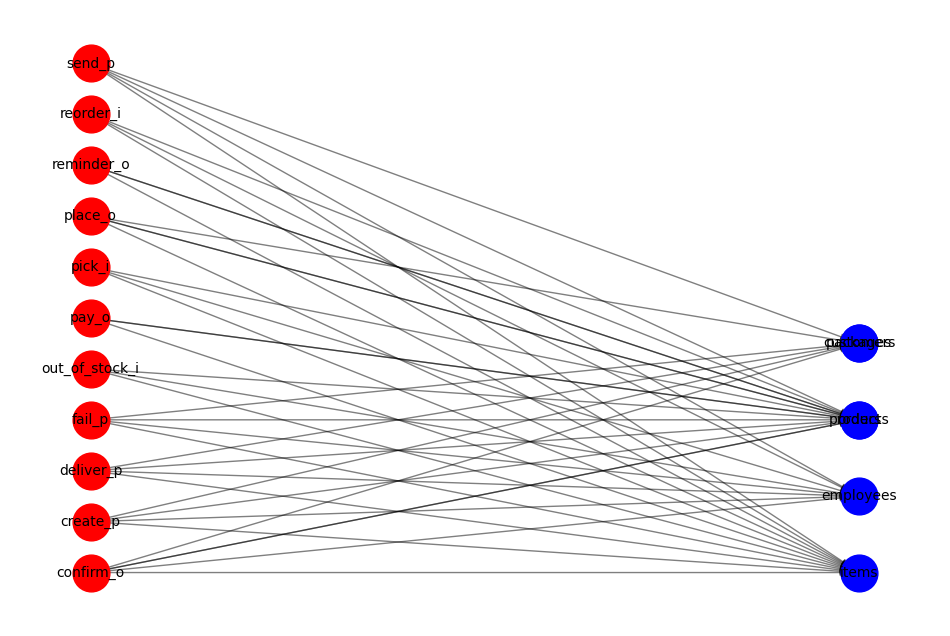

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import Dict

def draw_graph(input_dict: Dict[str, Dict[str, int]]):
    G = nx.DiGraph()

    for outer_key, inner_dict in input_dict.items():
      for inner_key in inner_dict.keys():
        G.add_edge(outer_key, inner_key)

    pos = {}

    # Assign positions for outer keys on the left side
    for i, outer_key in enumerate(input_dict.keys()):
      pos[outer_key] = (1, i)

    # Assign positions for inner keys on the right side
    for i, (outer_key, inner_dict) in enumerate(input_dict.items()):
        for j, inner_key in enumerate(inner_dict.keys()):
            pos[inner_key] = (2, j * 1.5)  # Adjust the spacing to prevent overlap

    plt.figure(figsize=(12, 8))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if node in input_dict.keys()], node_color='r', node_size=700)
    nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes() if node not in input_dict.keys()], node_color='b', node_size=700)

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    plt.axis('off')
    plt.show()

# Example usage
input_dict = result_dict

draw_graph(input_dict)


In [ ]:
def add_to_map(data: Dict[str, Dict[str, int]], result_map: Dict[str, int]):
    for inner_dict in data.values():
        for key, value in inner_dict.items():
            if key not in result_map:
                result_map[key] = value
            else:
                result_map[key] += value
result_map = {}
add_to_map(objects_ot_count, result_map)

In [ ]:
print(len(objects_ot_count))
print(result_map)

21008
{'employees': 17492, 'customers': 4000, 'items': 60935, 'products': 54697, 'orders': 6566, 'packages': 3695}


In [ ]:
temporal_summary = pm4py.ocel_temporal_summary(ocel)

Returns the ``temporal summary’’ from an object-centric event log. The temporal summary aggregates all the events performed in the same timestamp, and reports the list of activities and the involved objects.

In [ ]:
print(len(temporal_summary))
print(temporal_summary.head())

19941
             ocel:timestamp  \
0 2023-04-03 10:08:18+00:00   
1 2023-04-03 11:21:49+00:00   
2 2023-04-03 14:36:55+00:00   
3 2023-04-03 21:31:23+00:00   
4 2023-04-04 07:50:21+00:00   

                                       ocel:activity  \
0  [place order, place order, place order, place ...   
1                  [pick item, pick item, pick item]   
2  [place order, place order, place order, place ...   
3  [place order, place order, place order, place ...   
4                  [pick item, pick item, pick item]   

                                            ocel:oid  
0  [AlpenTech Innovations AG, i-880002, Echo, i-8...  
1  [iPhone 11 Pro, Leah Tacke genannt Unterberg, ...  
2  [Kindle Paperwhite, AlpenTech Innovations AG, ...  
3  [i-880012, iPhone X, Kindle Paperwhite, i-8800...  
4     [i-880001, Leah Tacke genannt Unterberg, Echo]  


In [ ]:
objects_summary = pm4py.ocel_objects_summary(ocel)
print(len(objects_summary))
print(objects_summary.head())

10840
                    ocel:oid  \
0           Alessandro Berti   
1   AlpenTech Innovations AG   
2     Balkan Minerals d.o.o.   
3  Baltic Wave Energies Ltd.   
4             Benedikt Knopp   

                                activities_lifecycle  \
0  [send package, package delivered, send package...   
1  [place order, place order, confirm order, conf...   
2  [place order, confirm order, place order, conf...   
3  [place order, confirm order, place order, conf...   
4  [pick item, item out of stock, pick item, pick...   

            lifecycle_start             lifecycle_end  lifecycle_duration  \
0 2023-04-13 10:50:06+00:00 2024-05-15 06:44:11+00:00          34372445.0   
1 2023-04-03 10:08:18+00:00 2024-03-20 11:14:15+00:00          30416757.0   
2 2023-04-05 04:24:56+00:00 2024-03-20 15:42:13+00:00          30280637.0   
3 2023-04-04 10:30:50+00:00 2024-03-20 13:00:35+00:00          30335385.0   
4 2023-04-04 13:08:41+00:00 2024-05-11 23:00:00+00:00          34854679.0   

 

Gets the objects interactions summary of an object-centric event log. The objects interactions summary has a row for every combination (event, related object, other related object). Properties such as the activity of the event, and the object types of the two related objects, are included.

In [ ]:
interactions_summary = pm4py.ocel_objects_interactions_summary(ocel)

In [ ]:
print(len(interactions_summary))
print(interactions_summary.head())

1524396
           ocel:eid  ocel:activity           ocel:oid  ocel:type  \
0  confirm_o-990001  confirm order  Wil van der Aalst  employees   
1  confirm_o-990001  confirm order  Wil van der Aalst  employees   
2  confirm_o-990001  confirm order  Wil van der Aalst  employees   
3  confirm_o-990001  confirm order  Wil van der Aalst  employees   
4  confirm_o-990001  confirm order  Wil van der Aalst  employees   

                 ocel:oid_2 ocel:type_2  
0  AlpenTech Innovations AG   customers  
1                  i-880002       items  
2                      Echo    products  
3                  i-880001       items  
4             iPhone 11 Pro    products  


In [ ]:
sampled_ocel = pm4py.sample_ocel_objects(ocel, 50)
print(sampled_ocel.get_extended_table())

                  ocel:eid            ocel:timestamp      ocel:activity  \
0           place_o-990033 2023-04-18 05:33:53+00:00        place order   
1         confirm_o-990033 2023-04-18 09:07:33+00:00      confirm order   
2           place_o-990037 2023-04-19 11:26:23+00:00        place order   
3         confirm_o-990037 2023-04-19 13:03:35+00:00      confirm order   
4    out_of_stock_i-880164 2023-04-19 19:26:39+00:00  item out of stock   
..                     ...                       ...                ...   
340           pay_o-991824 2024-03-15 13:45:49+00:00          pay order   
341         place_o-991955 2024-03-15 16:09:20+00:00        place order   
342       confirm_o-991955 2024-03-18 14:27:42+00:00      confirm order   
343  reminder_o-991955_539 2024-04-07 14:27:42+00:00   payment reminder   
344           pay_o-991955 2024-04-10 10:02:55+00:00          pay order   

    ocel:type:items ocel:type:orders ocel:type:packages  
0        [i-880144]              NaN     

In [ ]:
sampled_ocel = pm4py.sample_ocel_connected_components(ocel, 3)
print(sampled_ocel.get_extended_table())

               ocel:eid            ocel:timestamp      ocel:activity  \
0        place_o-990001 2023-04-03 10:08:18+00:00        place order   
1         pick_i-880003 2023-04-03 11:21:49+00:00          pick item   
2        place_o-990002 2023-04-03 14:36:55+00:00        place order   
3        place_o-990003 2023-04-03 21:31:23+00:00        place order   
4         pick_i-880001 2023-04-04 07:50:21+00:00          pick item   
...                 ...                       ...                ...   
21003  deliver_p-661127 2024-05-28 10:49:37+00:00  package delivered   
21004   create_p-661128 2024-05-31 23:00:00+00:00     create package   
21005     send_p-661128 2024-06-03 08:20:59+00:00       send package   
21006  deliver_p-661128 2024-06-03 10:17:54+00:00  package delivered   
21007      pay_o-991986 2024-06-04 18:12:07+00:00          pay order   

              ocel:type:customers  \
0      [AlpenTech Innovations AG]   
1                             NaN   
2      [AlpenTech Innova

Merge events in the OCEL that happen with the same activity at the same timestamp

In [ ]:
ocel2 = pm4py.read_ocel2_json('/content/order-management.json')
ocel2 = pm4py.ocel_merge_duplicates(ocel2)
print(ocel2.get_extended_table())

                                   ocel:eid            ocel:timestamp  \
0      0b43074c-807d-46dd-83c3-6c5dc21b1c0e 2023-04-03 10:08:18+00:00   
1      52224f03-6303-40d6-ad4d-6b723b6a7a8f 2023-04-03 11:21:49+00:00   
2      30c6ec86-b0e2-4a05-b5f2-073190039688 2023-04-03 14:36:55+00:00   
3      212c247a-e41d-4a2b-8a15-e9fe5ad9653d 2023-04-03 21:31:23+00:00   
4      aecf93c6-8bb4-4442-87a1-1e097eb00375 2023-04-04 07:50:21+00:00   
...                                     ...                       ...   
20994  846b7b02-75ad-4f4b-bc60-fc919bd4f86f 2024-05-28 10:49:37+00:00   
20995  1f17d0f0-6447-4a17-bfd2-acd770a177aa 2024-05-31 23:00:00+00:00   
20996  bf14466d-4680-4501-9fe2-dbce02c718b1 2024-06-03 08:20:59+00:00   
20997  7df2a2a1-2f8f-4986-a815-222efc6079e8 2024-06-03 10:17:54+00:00   
20998  120f346a-f921-4103-974a-75798f75ae58 2024-06-04 18:12:07+00:00   

           ocel:activity         ocel:type:customers  \
0            place order  [AlpenTech Innovations AG]   
1          

In [ ]:
ocel3 = pm4py.read_ocel2_json('/content/order-management.json')
ocel3 = pm4py.ocel_drop_duplicates(ocel3)
print(ocel3.get_extended_table())

               ocel:eid            ocel:timestamp      ocel:activity  \
0        place_o-990001 2023-04-03 10:08:18+00:00        place order   
1         pick_i-880003 2023-04-03 11:21:49+00:00          pick item   
2        place_o-990002 2023-04-03 14:36:55+00:00        place order   
3        place_o-990003 2023-04-03 21:31:23+00:00        place order   
4         pick_i-880001 2023-04-04 07:50:21+00:00          pick item   
...                 ...                       ...                ...   
21003  deliver_p-661127 2024-05-28 10:49:37+00:00  package delivered   
21004   create_p-661128 2024-05-31 23:00:00+00:00     create package   
21005     send_p-661128 2024-06-03 08:20:59+00:00       send package   
21006  deliver_p-661128 2024-06-03 10:17:54+00:00  package delivered   
21007      pay_o-991986 2024-06-04 18:12:07+00:00          pay order   

              ocel:type:customers  \
0      [AlpenTech Innovations AG]   
1                             NaN   
2      [AlpenTech Innova

Inserts the information inferred from the graph computations (pm4py.discover_objects_graph) in the list of O2O relations of the OCEL.

In [ ]:
ocel4 = pm4py.read_ocel2_json('/content/order-management.json')
ocel4 = pm4py.ocel_o2o_enrichment(ocel4)
print(ocel4.o2o)

                     ocel:oid      ocel:oid_2            ocel:qualifier
0                    o-990001        i-880001                 comprises
1                    o-990001        i-880002                 comprises
2                    o-990001        i-880003                 comprises
3                    o-990002        i-880004                 comprises
4                    o-990002        i-880005                 comprises
...                       ...             ...                       ...
535681               i-881422  Benedikt Knopp  object_interaction_graph
535682  Eduardo Goulart Rocha        i-880856  object_interaction_graph
535683               i-883718      Fire Stick  object_interaction_graph
535684               o-991033     Echo Show 8  object_interaction_graph
535685               i-884447        p-660664  object_interaction_graph

[564077 rows x 3 columns]


In [ ]:
ocel5 = pm4py.read_ocel2_json('/content/order-management.json')
ocel5 = pm4py.ocel_e2o_lifecycle_enrichment(ocel5)
print(ocel5.relations)

             ocel:eid ocel:activity            ocel:timestamp  \
32972  place_o-990001   place order 2023-04-03 10:08:18+00:00   
32973  place_o-990001   place order 2023-04-03 10:08:18+00:00   
32974  place_o-990001   place order 2023-04-03 10:08:18+00:00   
32975  place_o-990001   place order 2023-04-03 10:08:18+00:00   
32976  place_o-990001   place order 2023-04-03 10:08:18+00:00   
...               ...           ...                       ...   
16634    pay_o-991986     pay order 2024-06-04 18:12:07+00:00   
16635    pay_o-991986     pay order 2024-06-04 18:12:07+00:00   
16636    pay_o-991986     pay order 2024-06-04 18:12:07+00:00   
16637    pay_o-991986     pay order 2024-06-04 18:12:07+00:00   
16638    pay_o-991986     pay order 2024-06-04 18:12:07+00:00   

                       ocel:oid  ocel:type ocel:qualifier  
32972  AlpenTech Innovations AG  customers       creation  
32973                  i-880002      items       creation  
32974                      Echo   produ

Perform a clustering of the object-centric event log, based on the ‘executions’ of a single object type. Equivalent ‘executions’ are grouped in the output dictionary.

In [ ]:
ocdfg = pm4py.discover_ocdfg(ocel)


In [ ]:
ocpn = pm4py.discover_oc_petri_net(ocel)

In [ ]:
import pm4py
from pm4py.visualization.ocel.eve_to_obj_types import visualizer

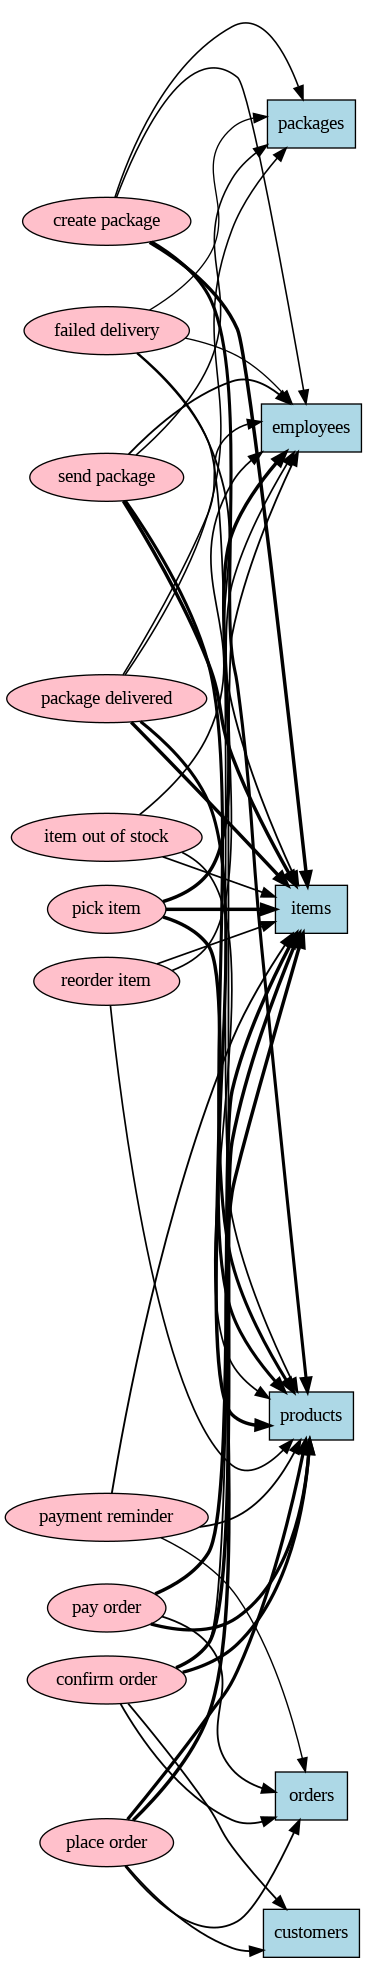

In [ ]:
gviz = visualizer.apply(ocel)
visualizer.view(gviz)

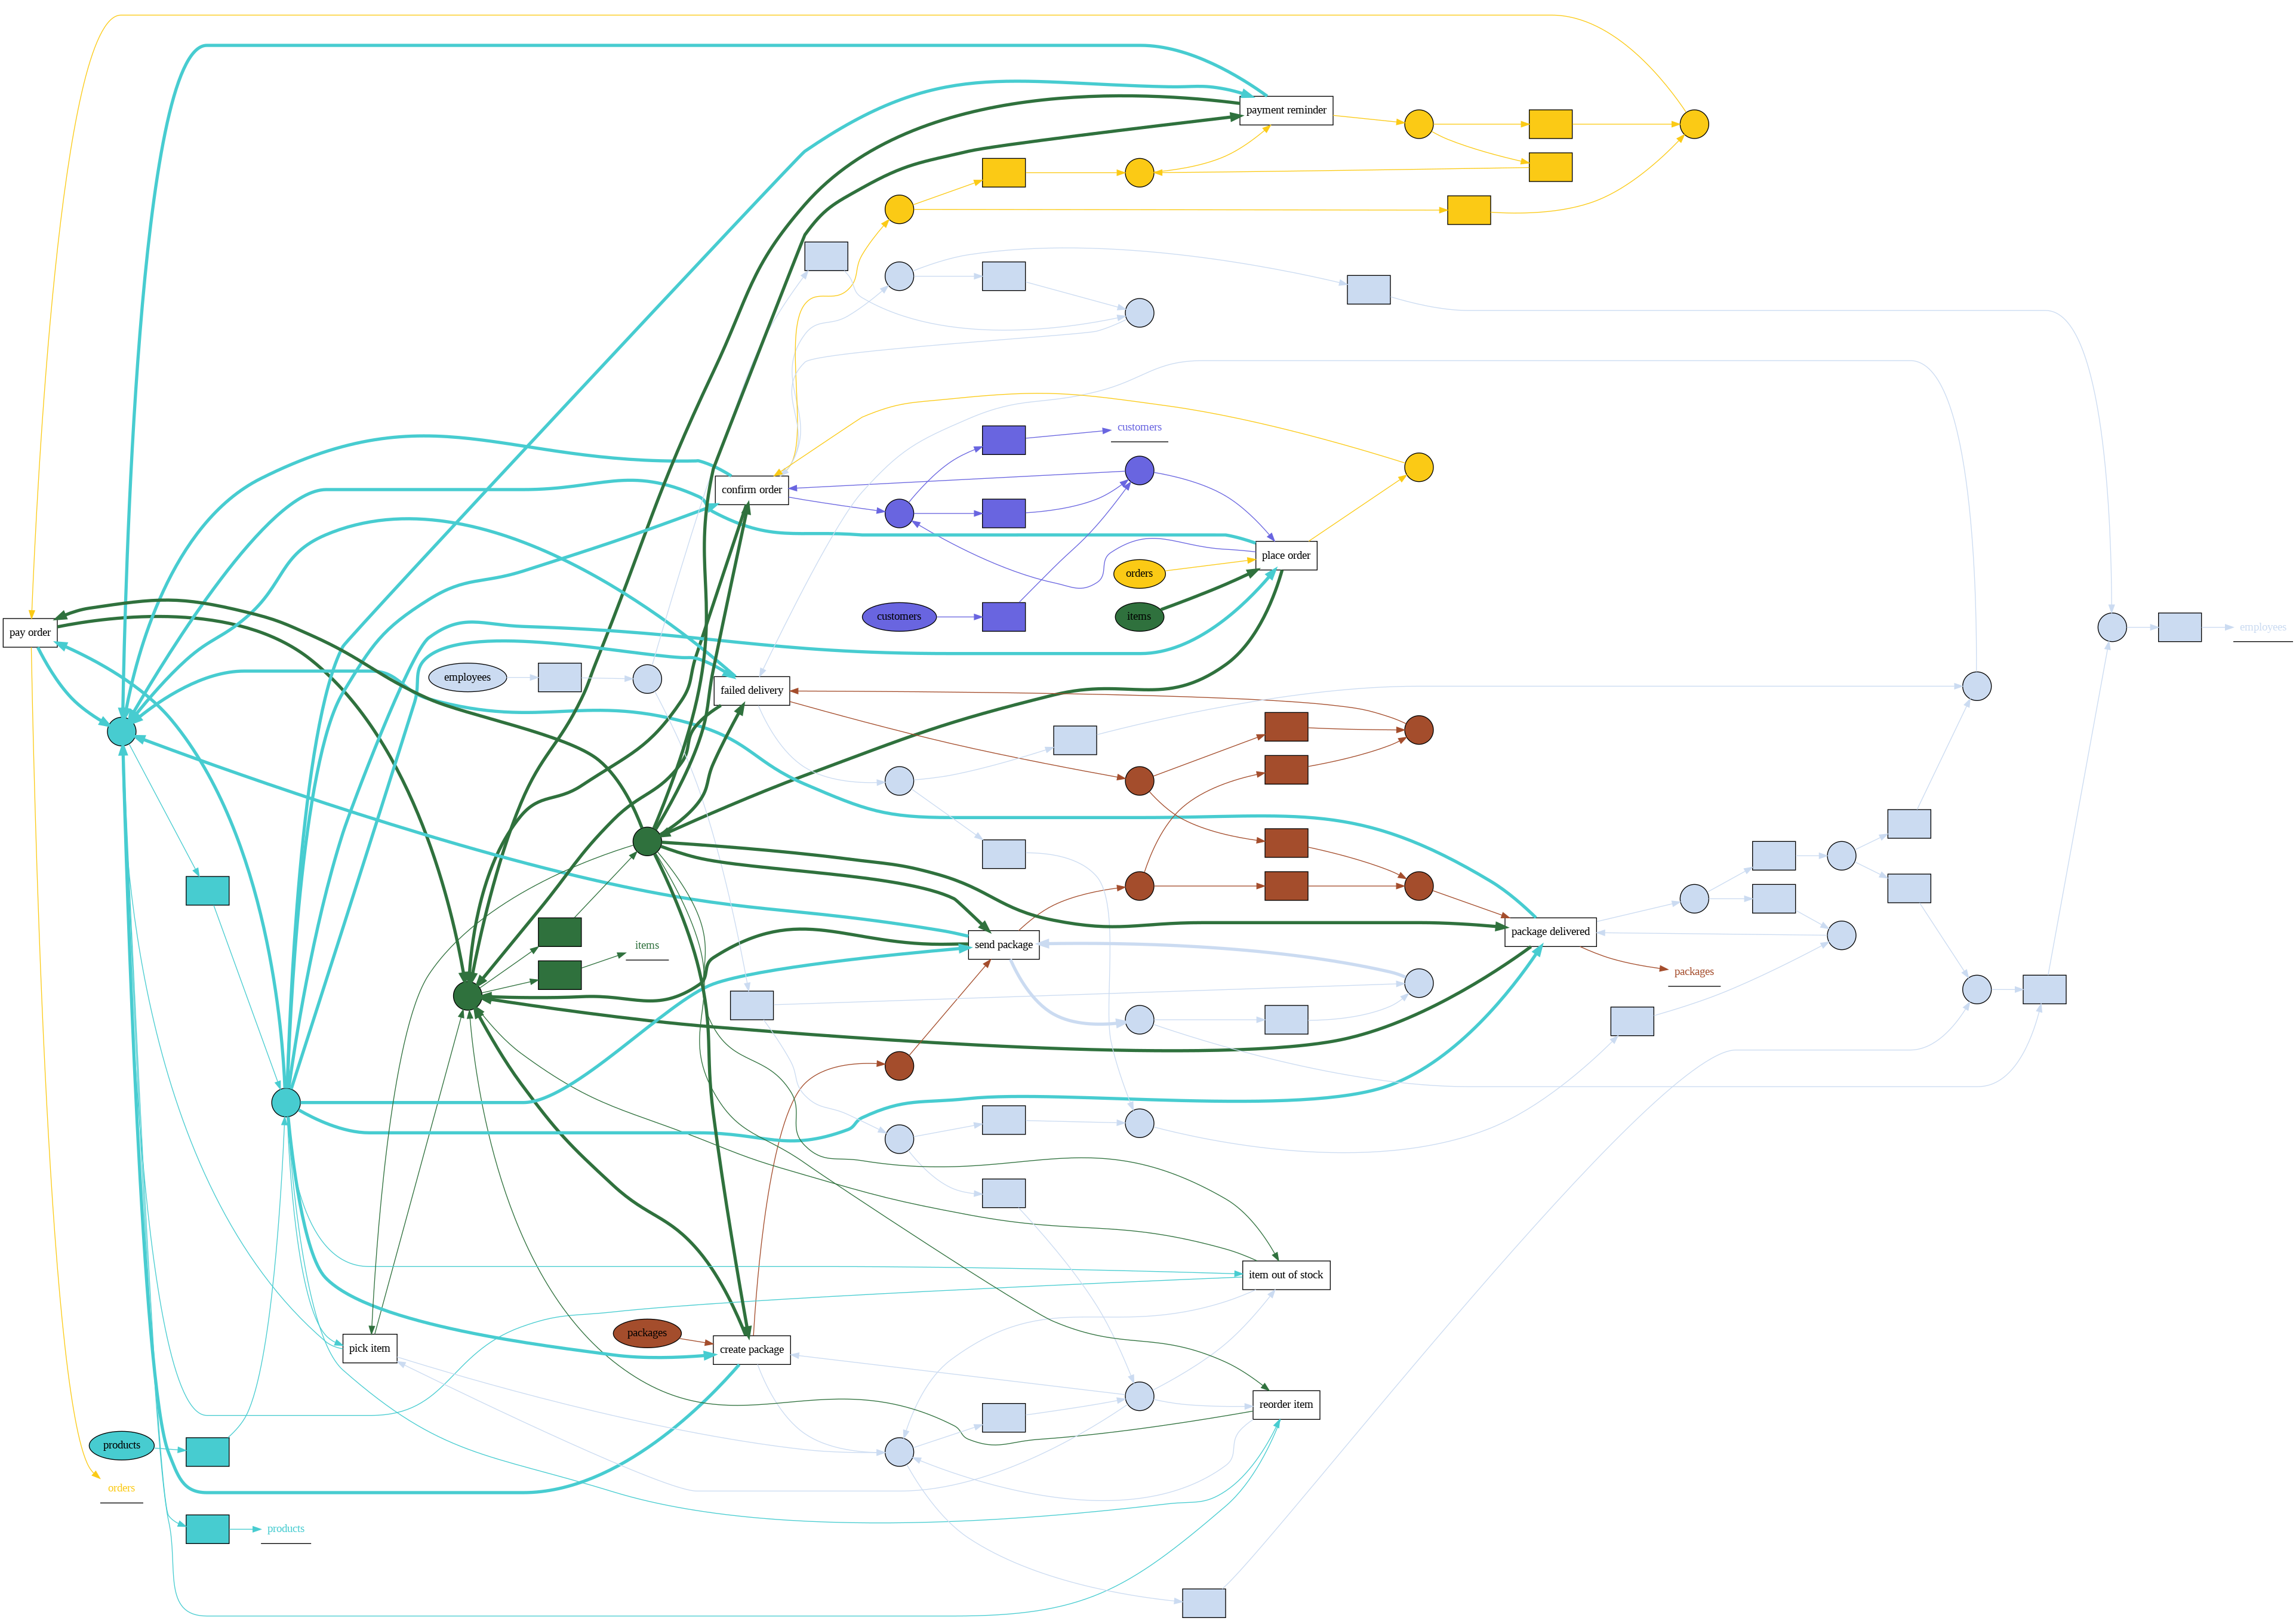

In [ ]:
from pm4py.algo.discovery.ocel.ocpn import algorithm as ocpn_discovery
from pm4py.visualization.ocel.ocpn import visualizer as ocpn_visualizer

# Discover the process model as an object-centric Petri net
ocpn = ocpn_discovery.apply(ocel)

# Visualize the Petri Net
gviz = ocpn_visualizer.apply(ocpn)
ocpn_visualizer.view(gviz)

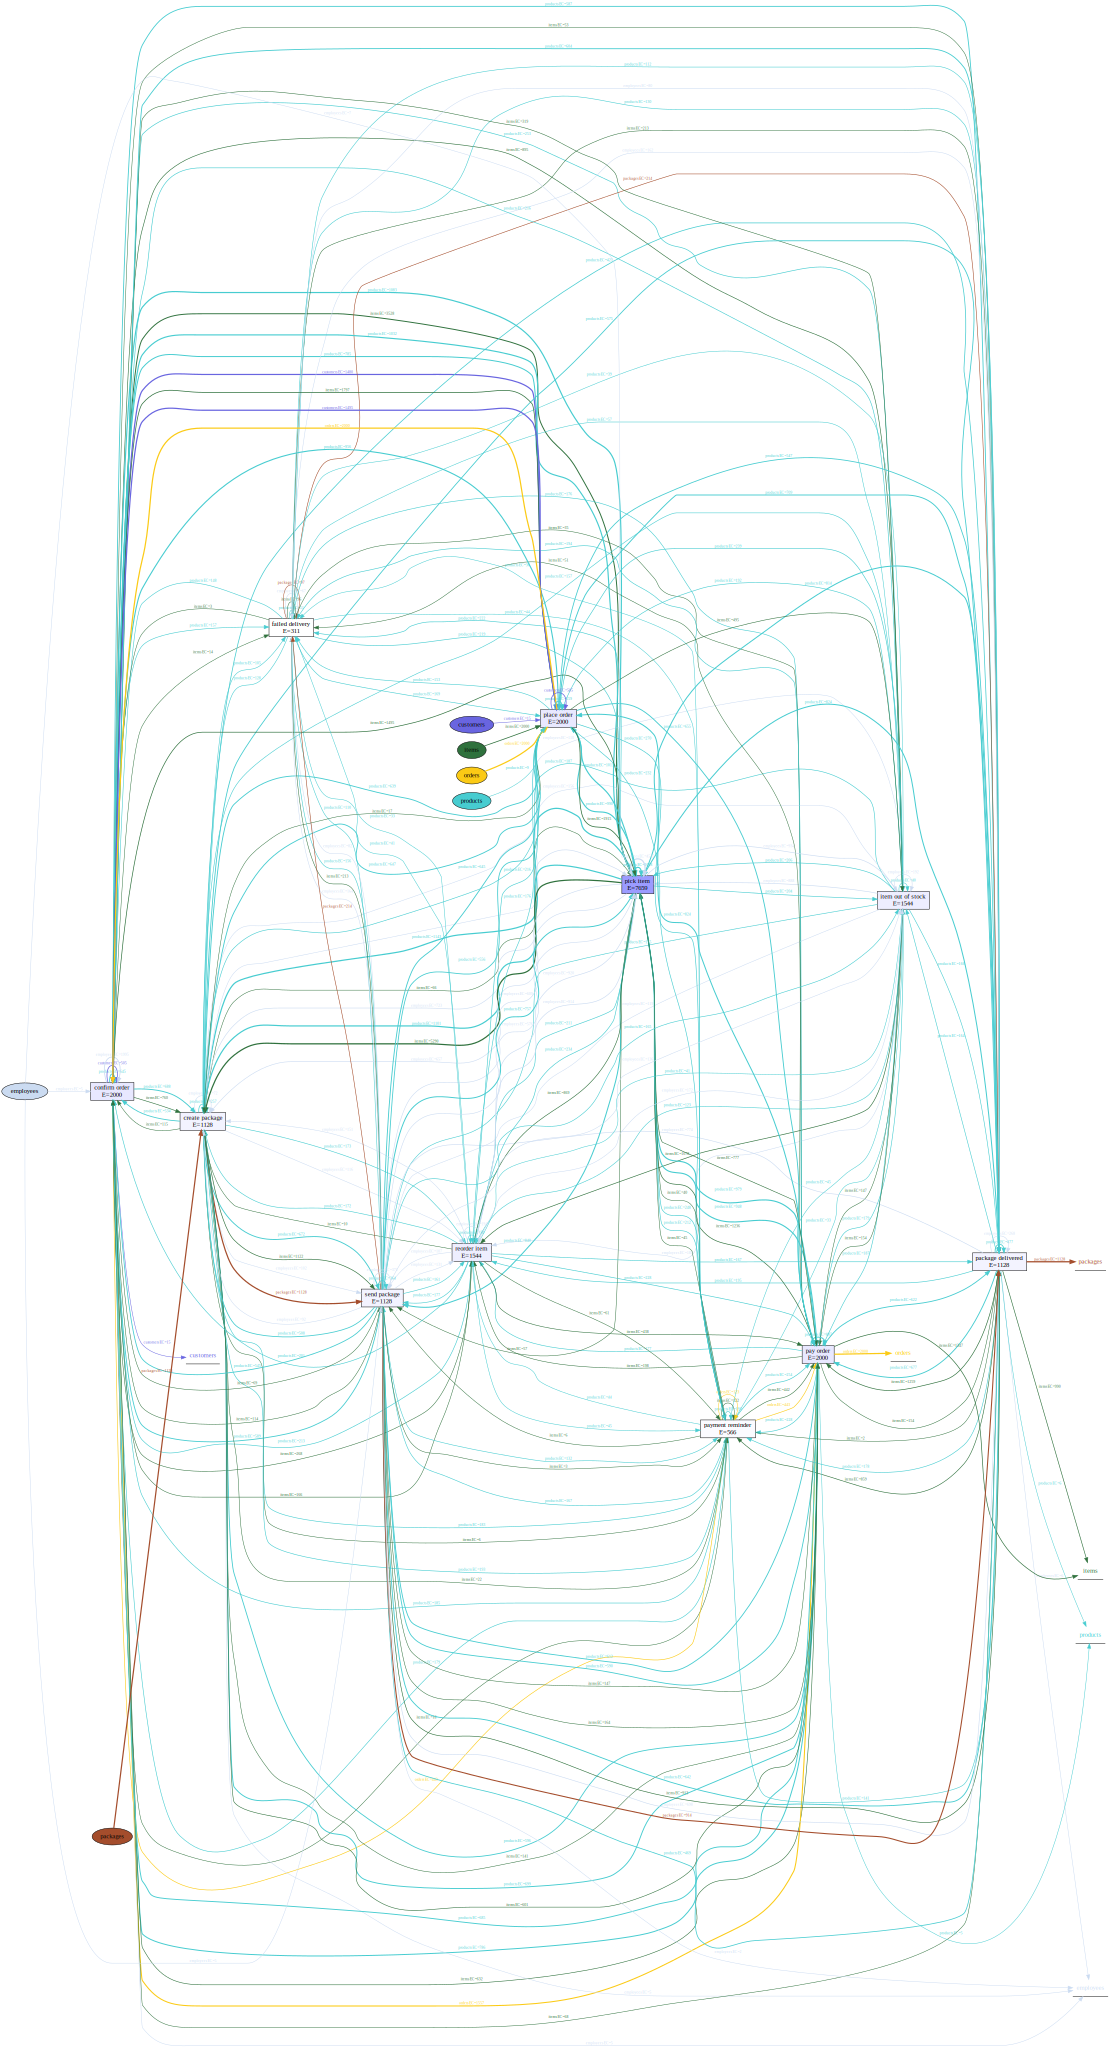

In [ ]:
pm4py.visualization.ocel.ocdfg.visualizer.apply(ocdfg)

In [ ]:
obj_graph = pm4py.ocel_discover_objects_graph(ocel, graph_type='object_interaction')

AttributeError: module 'pm4py' has no attribute 'ocel_discover_objects_graph'

'orders', 'items', 'packages', 'customers', 'products', 'employees'

In [ ]:
event_log_i = pm4py.ocel_flattening(ocel, 'items')
event_log_o = pm4py.ocel_flattening(ocel, 'orders')
event_log_pa = pm4py.ocel_flattening(ocel, 'packages')
event_log_c = pm4py.ocel_flattening(ocel, 'customers')
event_log_pr = pm4py.ocel_flattening(ocel, 'products')
event_log_e = pm4py.ocel_flattening(ocel, 'employees')


In [ ]:
list1 = ["items"]

In [ ]:
print(event_log_i.columns)

Index(['ocel:eid', 'time:timestamp', 'concept:name', 'case:concept:name',
       'case:ocel:type', 'case:price', 'case:weight', 'case:role'],
      dtype='object')


In [ ]:
print(event_log_i)

             ocel:eid            time:timestamp concept:name  \
0      place_o-990001 2023-04-03 10:08:18+00:00  place order   
1      place_o-990001 2023-04-03 10:08:18+00:00  place order   
2      place_o-990001 2023-04-03 10:08:18+00:00  place order   
3       pick_i-880003 2023-04-03 11:21:49+00:00    pick item   
4      place_o-990002 2023-04-03 14:36:55+00:00  place order   
...               ...                       ...          ...   
60930    pay_o-991986 2024-06-04 18:12:07+00:00    pay order   
60931    pay_o-991986 2024-06-04 18:12:07+00:00    pay order   
60932    pay_o-991986 2024-06-04 18:12:07+00:00    pay order   
60933    pay_o-991986 2024-06-04 18:12:07+00:00    pay order   
60934    pay_o-991986 2024-06-04 18:12:07+00:00    pay order   

      case:concept:name case:ocel:type  case:price  case:weight case:role  
0              i-880001          items       99.99        0.780       NaN  
1              i-880002          items       99.99        0.780       NaN  
2  

In [ ]:
print(event_log_o)

                   ocel:eid            time:timestamp      concept:name  \
0            place_o-990001 2023-04-03 10:08:18+00:00       place order   
1            place_o-990002 2023-04-03 14:36:55+00:00       place order   
2            place_o-990003 2023-04-03 21:31:23+00:00       place order   
3            place_o-990004 2023-04-04 10:30:50+00:00       place order   
4          confirm_o-990002 2023-04-04 14:09:41+00:00     confirm order   
...                     ...                       ...               ...   
6561           pay_o-991907 2024-05-09 14:37:00+00:00         pay order   
6562  reminder_o-991917_565 2024-05-10 11:48:04+00:00  payment reminder   
6563  reminder_o-991986_566 2024-05-20 20:17:28+00:00  payment reminder   
6564           pay_o-991917 2024-05-23 16:40:59+00:00         pay order   
6565           pay_o-991986 2024-06-04 18:12:07+00:00         pay order   

     case:concept:name case:ocel:type  case:price  case:weight case:role  
0             o-990001  

In [ ]:
remade_ocel = pm4py.convert.convert_log_to_ocel(event_log_i, activity_column, timestamp_column, object_types, obj_separator,
                           additional_event_attributes, additional_object_attributes)

NameError: name 'activity_column' is not defined

In [ ]:
activity_column = 'concept:name'
timestamp_column = 'time:timestamp'
object_types = ['case:concept:name', 'case:ocel:type']  # List of columns to consider as object types
obj_separator = " AND "  # Separator between different objects in the same column
additional_event_attributes = None  # Additional attributes to be considered as event attributes in the OCEL
additional_object_attributes = None

remade_ocel = pm4py.convert.convert_log_to_ocel(event_log_o, activity_column, timestamp_column, object_types, obj_separator,
                           additional_event_attributes, additional_object_attributes)

from pm4py.algo.discovery.ocel.ocpn import algorithm as ocpn_discovery
from pm4py.visualization.ocel.ocpn import visualizer as ocpn_visualizer

# Discover the process model as an object-centric Petri net
ocpn = ocpn_discovery.apply(remade_ocel)

# Visualize the Petri Net
gviz = ocpn_visualizer.apply(ocpn)
ocpn_visualizer.view(gviz)

In [ ]:
activity_column = 'concept:name'
timestamp_column = 'time:timestamp'
object_types = ['case:concept:name', 'case:ocel:type', 'case:role']  # List of columns to consider as object types
obj_separator = " AND "  # Separator between different objects in the same column
additional_event_attributes = None  # Additional attributes to be considered as event attributes in the OCEL
additional_object_attributes = None

remade_ocel = pm4py.convert.convert_log_to_ocel(event_log_o, activity_column, timestamp_column, object_types, obj_separator,
                           additional_event_attributes, additional_object_attributes)

from pm4py.algo.discovery.ocel.ocpn import algorithm as ocpn_discovery
from pm4py.visualization.ocel.ocpn import visualizer as ocpn_visualizer

# Discover the process model as an object-centric Petri net
ocpn = ocpn_discovery.apply(remade_ocel)

# Visualize the Petri Net
gviz = ocpn_visualizer.apply(ocpn)
ocpn_visualizer.view(gviz)

In [ ]:
!pip install pm4py
import pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=0f95a0bd2a21d815a649a99f7446467a9c489398d350f391244ecbe0e3af1b22
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [ ]:
ocel = pm4py.read_ocel2_json('order-management.json')

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


In [ ]:
objects = ['orders', 'items','packages',	'products']

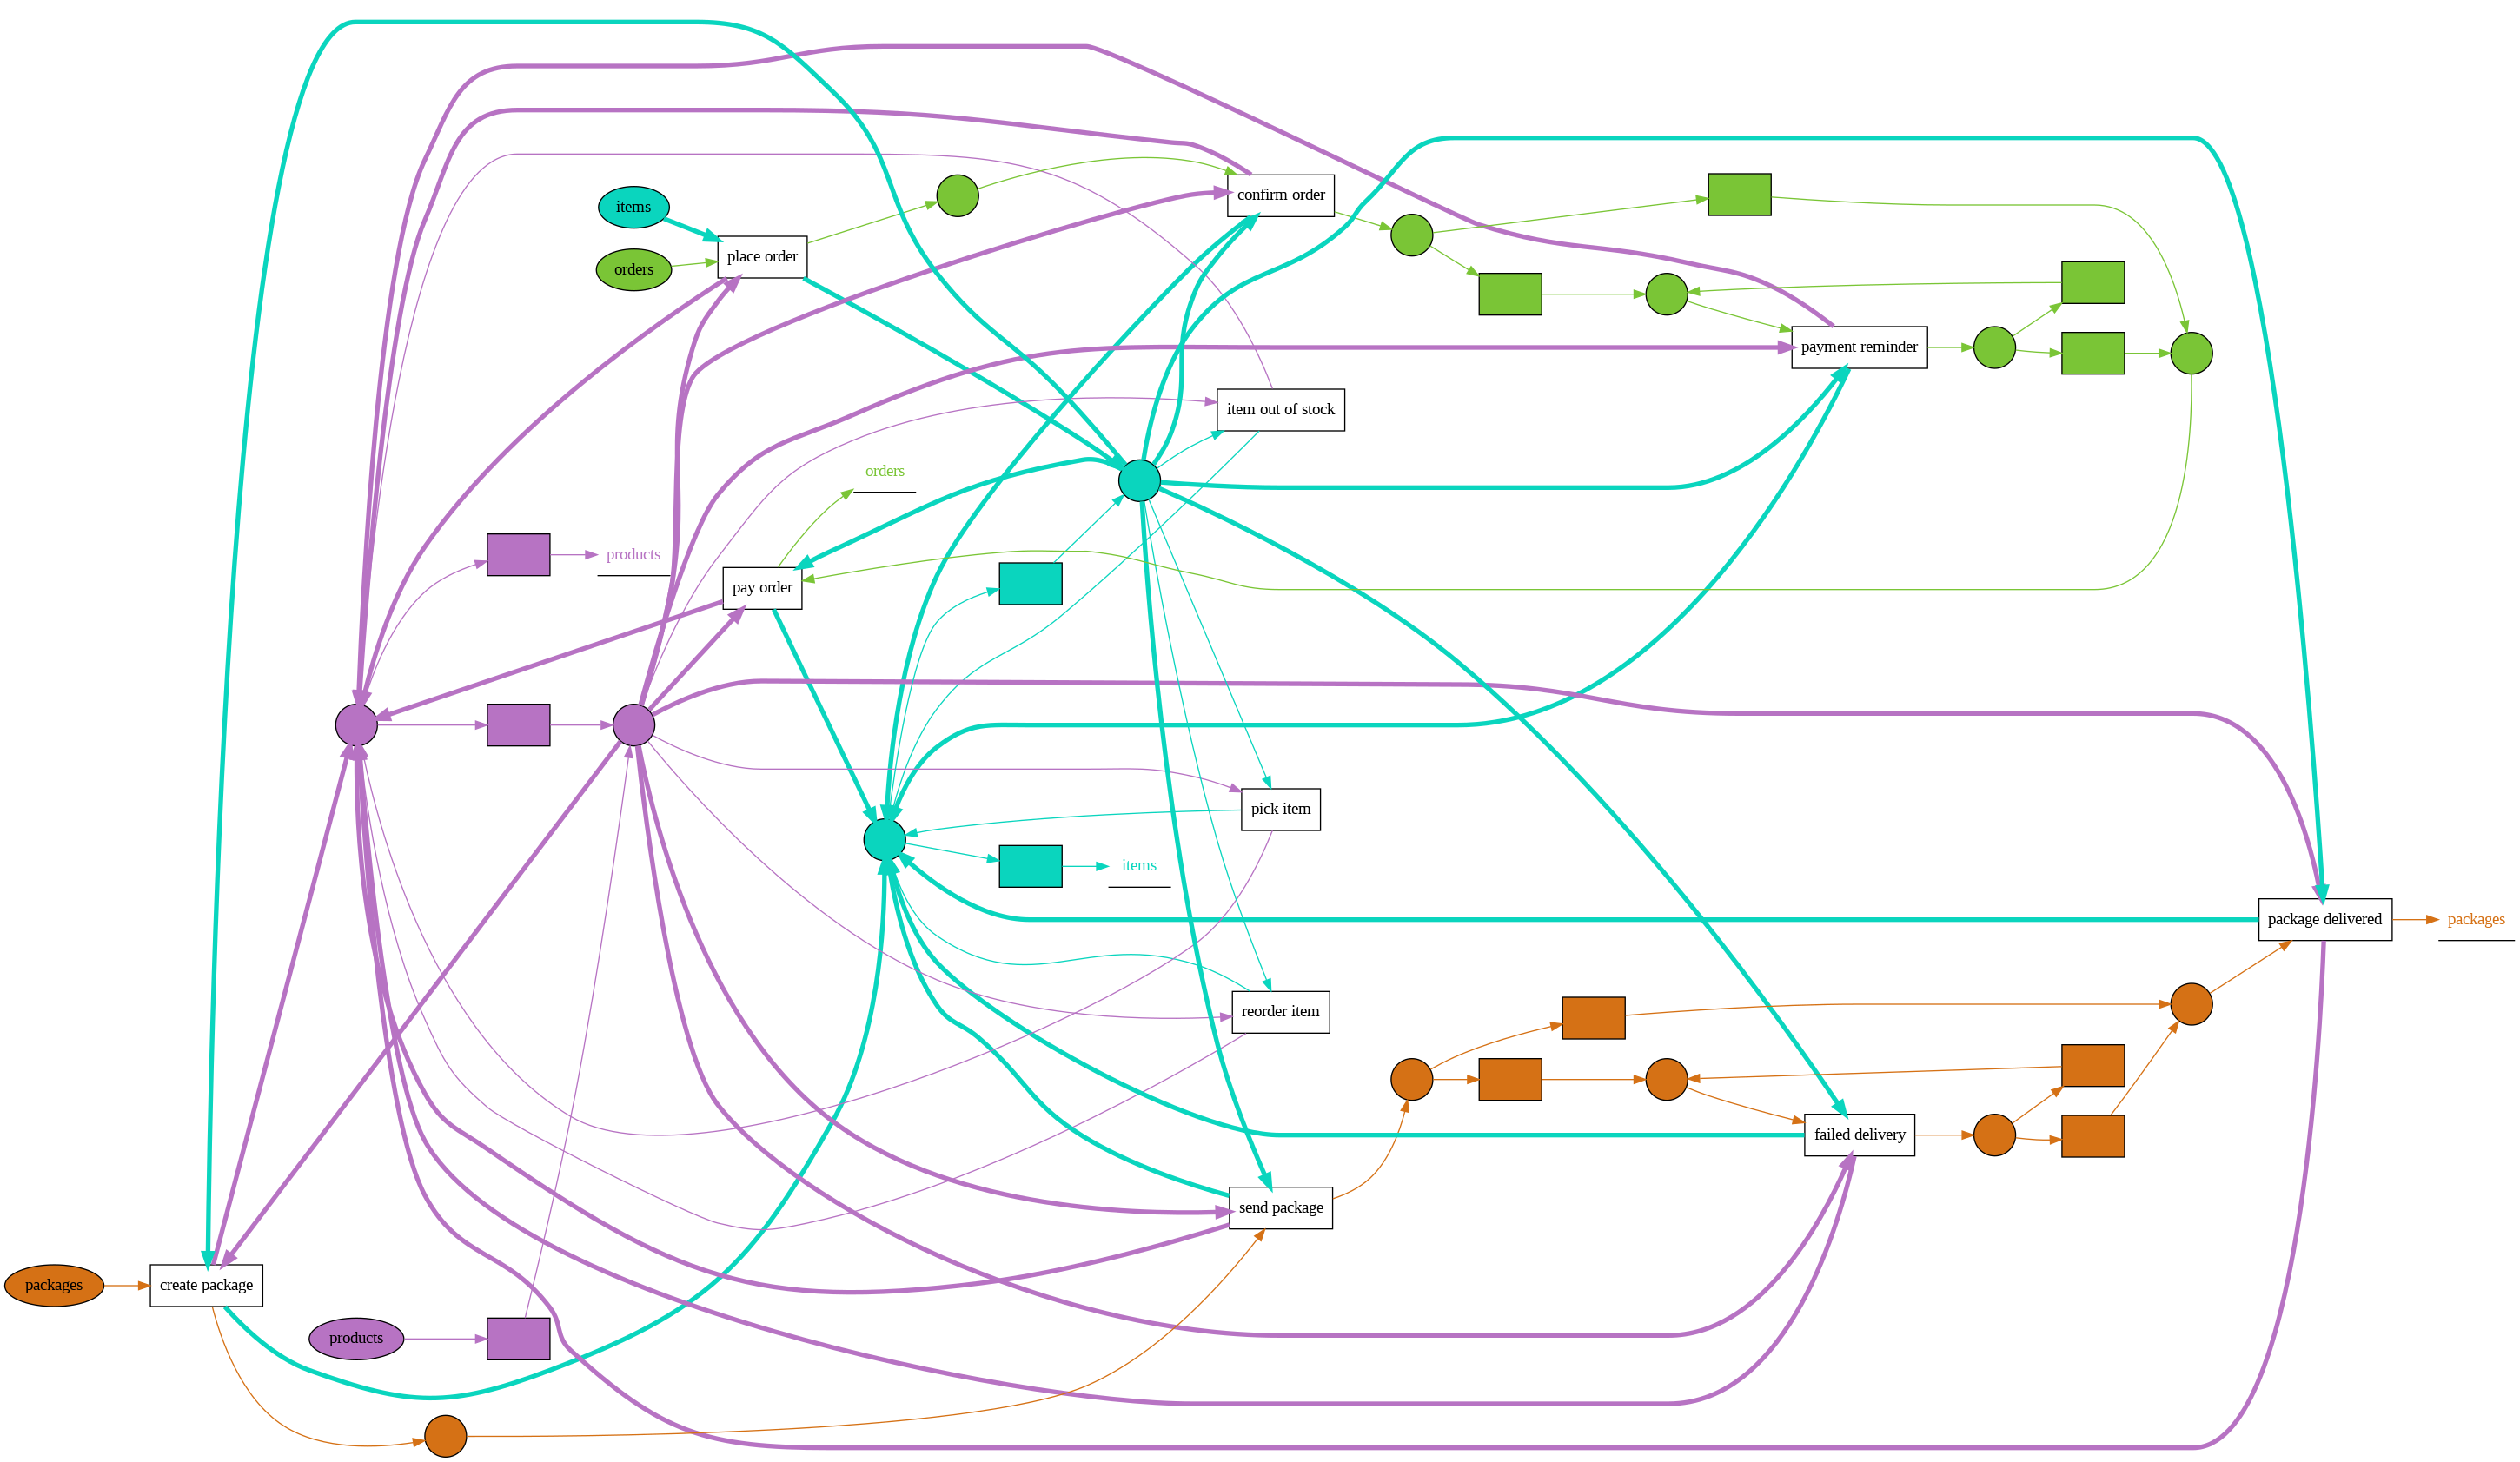

In [ ]:
filtered_ocel = pm4py.filter_ocel_object_types(ocel, objects)
from pm4py.algo.discovery.ocel.ocpn import algorithm as ocpn_discovery
from pm4py.visualization.ocel.ocpn import visualizer as ocpn_visualizer

# Discover the process model as an object-centric Petri net
ocpn = ocpn_discovery.apply(filtered_ocel)

# Visualize the Petri Net
gviz = ocpn_visualizer.apply(ocpn)
ocpn_visualizer.view(gviz)

In [ ]:
ocel = pm4py.read_ocel2_json('order-management.json')

In [ ]:
import pm4py
from itertools import combinations

objects = ['orders', 'customers', 'items', 'packages', 'products', 'employees']

def all_subsets(lst):
    subsets = []
    for i in range(1, len(lst) + 1):  # Starting from 1 to exclude the empty subset
        subsets.extend(map(list, combinations(lst, i)))
    return subsets

ocel = None  # Assuming you have some OCEL object defined

for subset in all_subsets(objects):
    print(subset)

['orders']
['customers']
['items']
['packages']
['products']
['employees']
['orders', 'customers']
['orders', 'items']
['orders', 'packages']
['orders', 'products']
['orders', 'employees']
['customers', 'items']
['customers', 'packages']
['customers', 'products']
['customers', 'employees']
['items', 'packages']
['items', 'products']
['items', 'employees']
['packages', 'products']
['packages', 'employees']
['products', 'employees']
['orders', 'customers', 'items']
['orders', 'customers', 'packages']
['orders', 'customers', 'products']
['orders', 'customers', 'employees']
['orders', 'items', 'packages']
['orders', 'items', 'products']
['orders', 'items', 'employees']
['orders', 'packages', 'products']
['orders', 'packages', 'employees']
['orders', 'products', 'employees']
['customers', 'items', 'packages']
['customers', 'items', 'products']
['customers', 'items', 'employees']
['customers', 'packages', 'products']
['customers', 'packages', 'employees']
['customers', 'products', 'employees

In [ ]:
ocel = pm4py.read_ocel2_json("order-management.json")

In [ ]:
import json

log = pm4py.write_ocel_json(ocel, 'event_log_filter')
jsonocel_log = "event_log_filter.jsonocel"

with open(jsonocel_log, 'r') as file:
  log_data = json.load(file)

relation_count = 0
events = log_data["ocel:events"]
for event_id in events:
  event_data = events[event_id]
  omap = event_data["ocel:omap"]
  relation_count += len(omap)
print(relation_count)

147385


In [ ]:
import json

subsets = all_subsets(objects)
for subset in subsets:
  filtered_ocel = pm4py.filter_ocel_object_types(ocel, subset)
  log = pm4py.write_ocel_json(filtered_ocel, 'event_log_filter')
  jsonocel_log = "event_log_filter.jsonocel"
  print(subset)
  with open(jsonocel_log, 'r') as file:
    log_data = json.load(file)

  relation_count = 0
  events = log_data["ocel:events"]
  for event_id in events:
    event_data = events[event_id]
    omap = event_data["ocel:omap"]
    relation_count += len(omap)
  print(relation_count)

['orders']
6566
['customers']
4000
['items']
60935
['packages']
3695
['products']
54697
['employees']
17492
['orders', 'customers']
10566
['orders', 'items']
67501
['orders', 'packages']
10261
['orders', 'products']
61263
['orders', 'employees']
24058
['customers', 'items']
64935
['customers', 'packages']
7695
['customers', 'products']
58697
['customers', 'employees']
21492
['items', 'packages']
64630
['items', 'products']
115632
['items', 'employees']
78427
['packages', 'products']
58392
['packages', 'employees']
21187
['products', 'employees']
72189
['orders', 'customers', 'items']
71501
['orders', 'customers', 'packages']
14261
['orders', 'customers', 'products']
65263
['orders', 'customers', 'employees']
28058
['orders', 'items', 'packages']
71196
['orders', 'items', 'products']
122198
['orders', 'items', 'employees']
84993
['orders', 'packages', 'products']
64958
['orders', 'packages', 'employees']
27753
['orders', 'products', 'employees']
78755
['customers', 'items', 'packages']


In [ ]:
filtered_ocel_2 = pm4py.filter_ocel_object_types(ocel, ["customers", "items"])
filtered_ocel_1 = pm4py.filter_ocel_object_types(ocel, ["orders", "items", "products", "packages"])
filtered_ocel_3 = pm4py.filter_ocel_object_types(ocel, ["packages"])


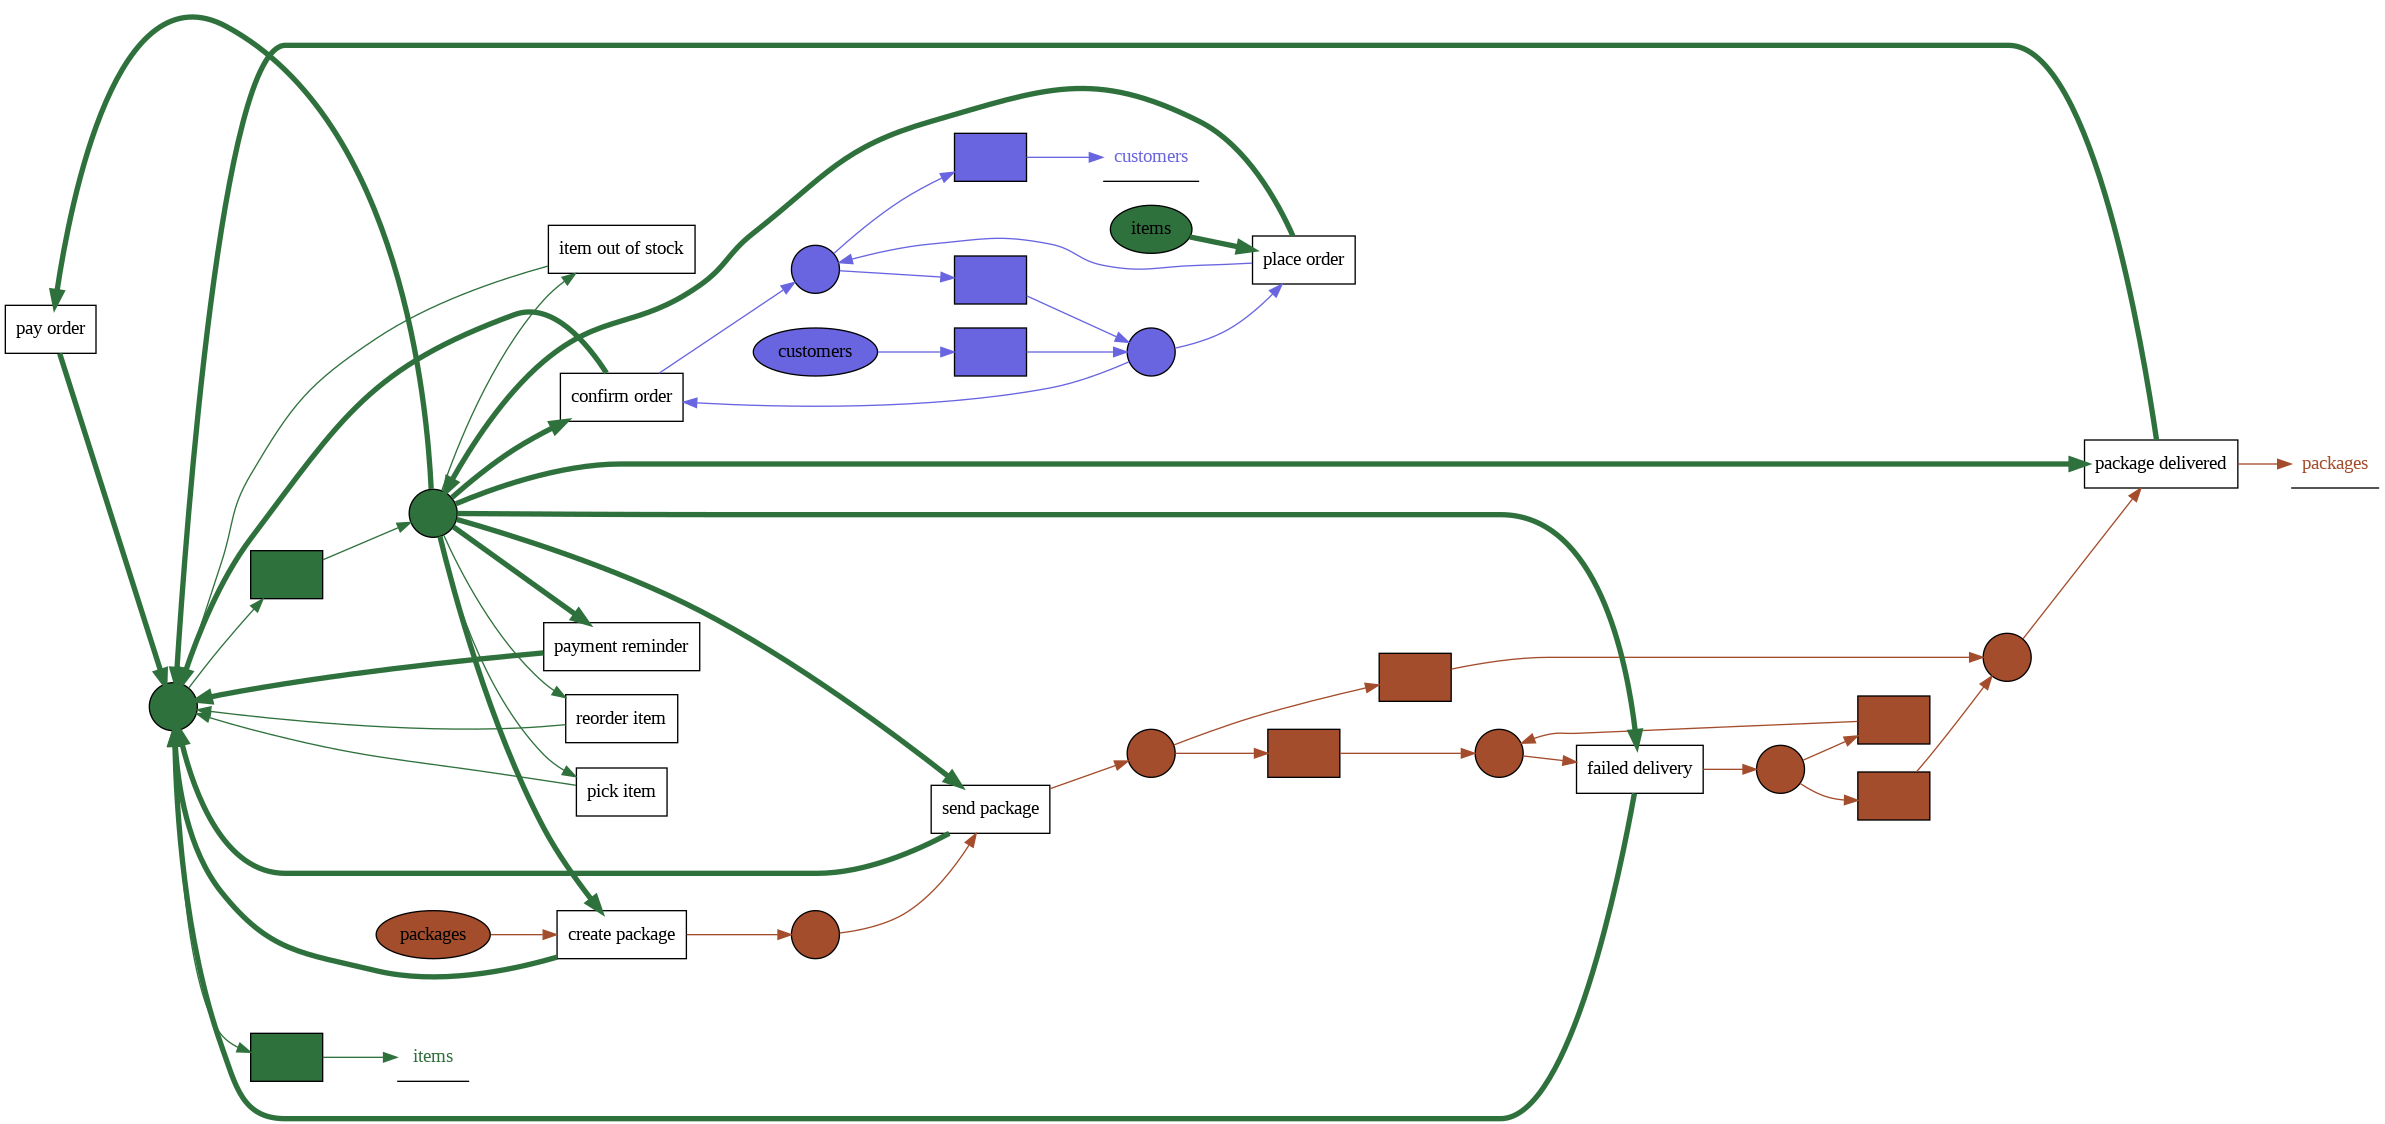

In [ ]:
from pm4py.algo.discovery.ocel.ocpn import algorithm as ocpn_discovery
from pm4py.visualization.ocel.ocpn import visualizer as ocpn_visualizer

# Discover the process model as an object-centric Petri net
ocpn = ocpn_discovery.apply(filtered_ocel_1)

# Visualize the Petri Net
gviz = ocpn_visualizer.apply(ocpn)
ocpn_visualizer.view(gviz)

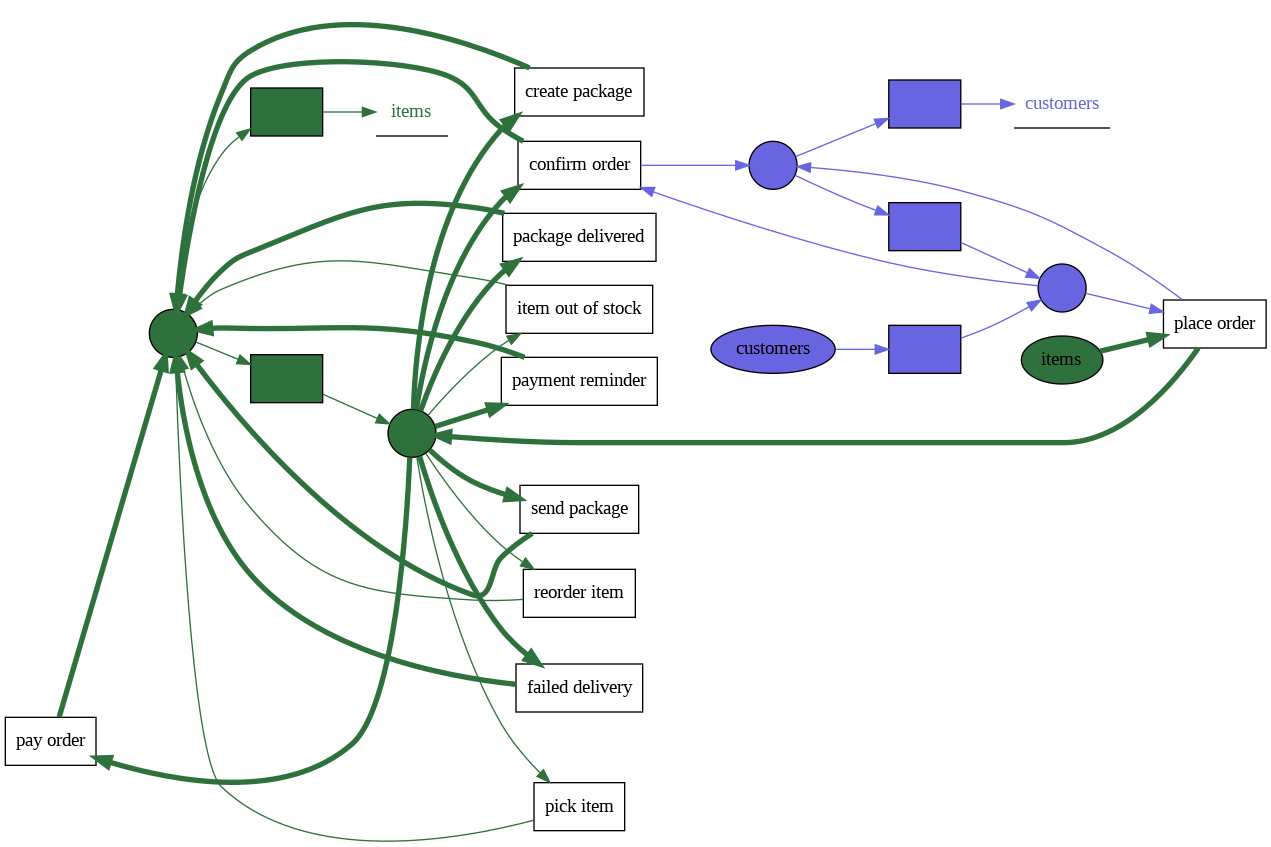

In [ ]:
from pm4py.algo.discovery.ocel.ocpn import algorithm as ocpn_discovery
from pm4py.visualization.ocel.ocpn import visualizer as ocpn_visualizer

# Discover the process model as an object-centric Petri net
ocpn = ocpn_discovery.apply(filtered_ocel_2)

# Visualize the Petri Net
gviz = ocpn_visualizer.apply(ocpn)
ocpn_visualizer.view(gviz)

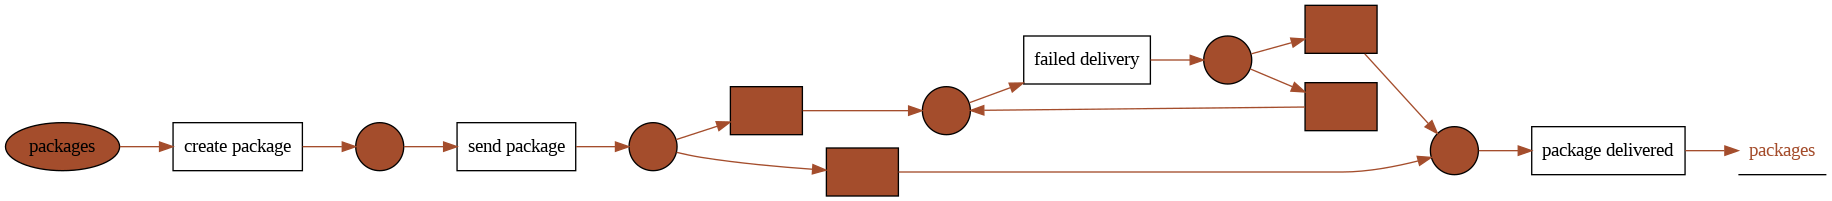

In [ ]:
from pm4py.algo.discovery.ocel.ocpn import algorithm as ocpn_discovery
from pm4py.visualization.ocel.ocpn import visualizer as ocpn_visualizer

# Discover the process model as an object-centric Petri net
ocpn = ocpn_discovery.apply(filtered_ocel_3)

# Visualize the Petri Net
gviz = ocpn_visualizer.apply(ocpn)
ocpn_visualizer.view(gviz)

In [ ]:
ocel = pm4py.read_ocel2_json("order-management.json")

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


In [ ]:
sampled_ocel = pm4py.sample_ocel_objects(ocel, 1000)

In [ ]:
sampled_ocel_filtered_1 = pm4py.sample_ocel_objects(filtered_ocel_1, 1000)

In [ ]:
log = pm4py.write.write_ocel_json(sampled_ocel, 'sampled_ocel_1000')

In [ ]:
log = pm4py.write.write_ocel_json(sampled_ocel_filtered_1, 'sampled_filtered_ocel_1000')

In [ ]:
data = []
for event in ocel.event_stream():
    data.append({k: event[k] for k in event.keys()})
df = pd.DataFrame(data)

AttributeError: 'OCEL' object has no attribute 'event_stream'

In [ ]:
import pm4py

filtered_ocel = pm4py.filter_ocel_object_types_allowed_activities(ocel, {'products': ["create package" ,"pay order ","place order ","package delivered" ,"confirm order" ,"item out of stock" ,"payment reminder" ,"send package" ,"reorder item" ,"failed delivery" ,"pick item"], 'items':["create package" ,"pay order ","place order ","package delivered" ,"confirm order" ,"item out of stock" ,"payment reminder" ,"send package" ,"reorder item" ,"failed delivery" ,"pick item"], 'orders': ["create package" ,"pay order ","place order ","package delivered" ,"confirm order" ,"item out of stock" ,"payment reminder" ,"send package" ,"reorder item" ,"failed delivery" ,"pick item"]})

In [ ]:
import pm4py

filtered_ocel = pm4py.filter_ocel_object_types_allowed_activities(ocel, {'products': ["pay order ","payment reminder"], 'items':["pay order ","payment reminder"], 'orders': ["pay order ","payment reminder"]})

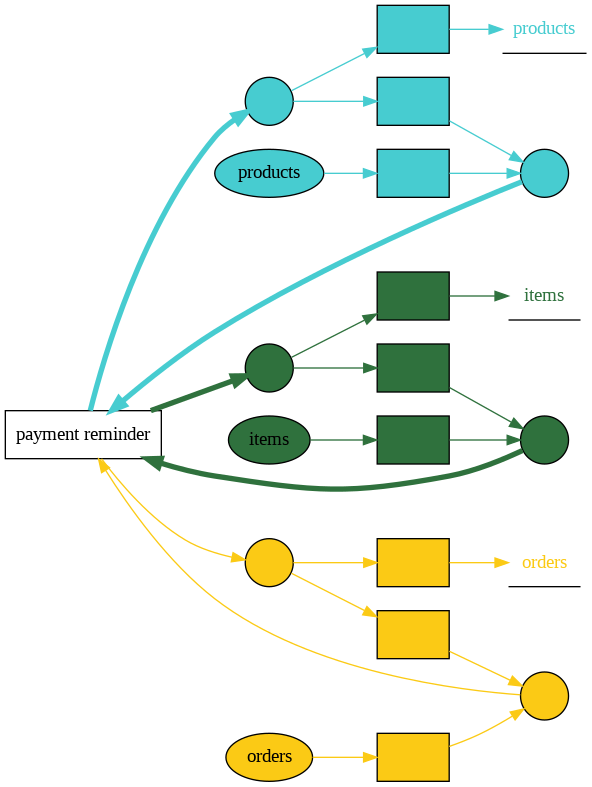

In [ ]:
from pm4py.algo.discovery.ocel.ocpn import algorithm as ocpn_discovery
from pm4py.visualization.ocel.ocpn import visualizer as ocpn_visualizer

# Discover the process model as an object-centric Petri net
ocpn = ocpn_discovery.apply(filtered_ocel)

# Visualize the Petri Net
gviz = ocpn_visualizer.apply(ocpn)
ocpn_visualizer.view(gviz)

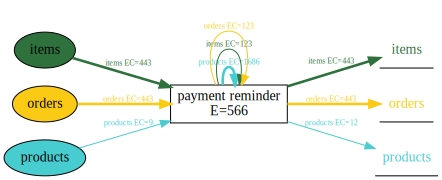

In [ ]:
ocdfg = pm4py.discover_ocdfg(filtered_ocel)
pm4py.visualization.ocel.ocdfg.visualizer.apply(ocdfg)

In [ ]:
import pandas as pd

condition_column_b = 'place order'  # Value you want to match in Column B
df = pd.DataFrame(ocel)
# Use boolean indexing to filter rows based on the condition
values_of_column_a = df.loc[df['ocel:activity'] == condition_column_b, 'ocel:type:customers'].unique()

print(values_of_column_a)

ValueError: DataFrame constructor not properly called!

In [ ]:
print(ocel.get_extended_table())

               ocel:eid            ocel:timestamp      ocel:activity  \
0        place_o-990001 2023-04-03 10:08:18+00:00        place order   
1         pick_i-880003 2023-04-03 11:21:49+00:00          pick item   
2        place_o-990002 2023-04-03 14:36:55+00:00        place order   
3        place_o-990003 2023-04-03 21:31:23+00:00        place order   
4         pick_i-880001 2023-04-04 07:50:21+00:00          pick item   
...                 ...                       ...                ...   
21003  deliver_p-661127 2024-05-28 10:49:37+00:00  package delivered   
21004   create_p-661128 2024-05-31 23:00:00+00:00     create package   
21005     send_p-661128 2024-06-03 08:20:59+00:00       send package   
21006  deliver_p-661128 2024-06-03 10:17:54+00:00  package delivered   
21007      pay_o-991986 2024-06-04 18:12:07+00:00          pay order   

              ocel:type:customers  \
0      [AlpenTech Innovations AG]   
1                             NaN   
2      [AlpenTech Innova

In [ ]:
import json

# Read the JSON file
json_file = "order-management.json"
with open(json_file, 'r') as file:
    data = json.load(file)

# Initialize a variable to store the sum of relationship lengths
relationship_length_sum = 0

# Iterate over objects in the JSON data
for obj in data.get("objects", []):
    relationships = obj.get("relationships", [])
    relationship_length_sum += len(relationships)

# Print or use the sum as required
print("Sum of relationship lengths:", relationship_length_sum)

Sum of relationship lengths: 28391


In [ ]:
import json

# Read the JSON file
subsets = all_subsets(objects)
for subset in subsets:
  filtered_ocel = pm4py.filter_ocel_object_types(ocel, subset)
  log = pm4py.write.write_ocel2_json(filtered_ocel, 'event_log_filter')
  json_file = "event_log_filter.json"
  with open(json_file, 'r') as file:
      data = json.load(file)

  # Initialize a variable to store the sum of relationship lengths
  relationship_length_sum = 0

  # Iterate over objects in the JSON data
  for obj in data.get("objects", []):
      relationships = obj.get("relationships", [])
      relationship_length_sum += len(relationships)

  # Print or use the sum as required
  print(subset)
  print("Sum of relationship lengths:", relationship_length_sum)

['orders']
Sum of relationship lengths: 0
['customers']
Sum of relationship lengths: 0
['items']
Sum of relationship lengths: 0
['packages']
Sum of relationship lengths: 0
['products']
Sum of relationship lengths: 0
['employees']
Sum of relationship lengths: 0
['orders', 'customers']
Sum of relationship lengths: 2000
['orders', 'items']
Sum of relationship lengths: 7659
['orders', 'packages']
Sum of relationship lengths: 0
['orders', 'products']
Sum of relationship lengths: 0
['orders', 'employees']
Sum of relationship lengths: 0
['customers', 'items']
Sum of relationship lengths: 0
['customers', 'packages']
Sum of relationship lengths: 0
['customers', 'products']
Sum of relationship lengths: 0
['customers', 'employees']
Sum of relationship lengths: 30
['items', 'packages']
Sum of relationship lengths: 7659
['items', 'products']
Sum of relationship lengths: 7659
['items', 'employees']
Sum of relationship lengths: 0
['packages', 'products']
Sum of relationship lengths: 0
['packages', 'e

In [ ]:
import json

subsets = all_subsets(objects)
for subset in subsets:
  filtered_ocel = pm4py.filter_ocel_object_types(ocel, subset)
  log = pm4py.write_ocel2_json(filtered_ocel, 'event_log_filter')
  jsonocel_log = "order-management.json"
  print(subset)
  with open(jsonocel_log, 'r') as file:
    log_data = json.load(file)

  relation_count = 0
  events = log_data["ocel:events"]
  for event_id in events:
    event_data = events[event_id]
    omap = event_data["ocel:omap"]
    relation_count += len(omap)
  print(relation_count)

In [ ]:
import json

subsets = all_subsets(objects)
for subset in subsets:
  filtered_ocel = pm4py.filter_ocel_object_types(ocel, subset)
  log = pm4py.write_ocel_json(filtered_ocel, 'event_log_filter')
  jsonocel_log = "event_log_filter.jsonocel"
  print(subset)
  with open(jsonocel_log, 'r') as file:
    log_data = json.load(file)

  relation_count = 0
  events = log_data["ocel:events"]
  for event_id in events:
    event_data = events[event_id]
    omap = event_data["ocel:omap"]
    relation_count += len(omap)
  print(relation_count)

['orders']
32447
['customers']
22367
['items']
64917
['employees']
0
['packages']
4366
['products']
58158
['orders', 'customers']
54814
['orders', 'items']
97364
['orders', 'employees']
32447
['orders', 'packages']
36813
['orders', 'products']
90605
['customers', 'items']
87284
['customers', 'employees']
22367
['customers', 'packages']
26733
['customers', 'products']
80525
['items', 'employees']
64917
['items', 'packages']
69283
['items', 'products']
123075
['employees', 'packages']
4366
['employees', 'products']
58158
['packages', 'products']
62524
['orders', 'customers', 'items']
119731
['orders', 'customers', 'employees']
54814
['orders', 'customers', 'packages']
59180
['orders', 'customers', 'products']
112972
['orders', 'items', 'employees']
97364
['orders', 'items', 'packages']
101730
['orders', 'items', 'products']
155522
['orders', 'employees', 'packages']
36813
['orders', 'employees', 'products']
90605
['orders', 'packages', 'products']
94971
['customers', 'items', 'employees'

In [ ]:
subsets = all_subsets(objects)
for subset in subsets:
  filtered_ocel = pm4py.filter_ocel_object_types(ocel, subset)
  objects_ot_count = pm4py.ocel_objects_ot_count(filtered_ocel)
  print(filtered_ocel.get_extended_table()['ocel:eid'].nunique())
  result_map = {}
  add_to_map(objects_ot_count, result_map)
  print(result_map)

6566
{'orders': 6566}
4000
{'customers': 4000}
21008
{'items': 60935}
16442
{'employees': 17492}
3695
{'packages': 3695}
21008
{'products': 54697}
6566
{'customers': 4000, 'orders': 6566}
21008
{'items': 60935, 'orders': 6566}
21008
{'employees': 17492, 'orders': 6566}
10261
{'orders': 6566, 'packages': 3695}
21008
{'products': 54697, 'orders': 6566}
21008
{'customers': 4000, 'items': 60935}
18442
{'employees': 17492, 'customers': 4000}
7695
{'customers': 4000, 'packages': 3695}
21008
{'customers': 4000, 'products': 54697}
21008
{'employees': 17492, 'items': 60935}
21008
{'items': 60935, 'packages': 3695}
21008
{'items': 60935, 'products': 54697}
16442
{'employees': 17492, 'packages': 3695}
21008
{'employees': 17492, 'products': 54697}
21008
{'products': 54697, 'packages': 3695}
21008
{'customers': 4000, 'items': 60935, 'orders': 6566}
21008
{'employees': 17492, 'customers': 4000, 'orders': 6566}
10261
{'customers': 4000, 'orders': 6566, 'packages': 3695}
21008
{'customers': 4000, 'pro

In [ ]:
log = pm4py.write_ocel_json(filtered_ocel, 'filtered_log_oic')

In [ ]:
import json

jsonocel_log_file = "filtered_log_oic.jsonocel"
with open(jsonocel_log_file, 'r') as file:
    log_data = json.load(file)

# Access and modify timestamps
events = log_data["ocel:events"]
for event_id in events:
    event_data = events[event_id]
    timestamp = event_data["ocel:timestamp"]
    # Remove the 'Z' if present
    if timestamp.endswith('Z'):
        event_data["ocel:timestamp"] = timestamp[:-1]  # Remove the last character ('Z')

# Write the modified log data back to the JSONOCel file
with open(jsonocel_log_file, 'w') as file:
    json.dump(log_data, file)